# Project 2

## Story

This project will use the dataset of video game sales from 2016 to determine whether or not a game was a hit or not a hit depending on how many copies they sold that week. The purpose of this is to see any patterns among games that are hits

In [ ]:
%pip install numpy pandas matplotlib seaborn 

In [50]:
import sklearn
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

## Reading in the Dataset

First we start off by reading the csv file into the notebook.
Kaggle Link: https://www.kaggle.com/datasets/xtyscut/video-games-sales-as-at-22-dec-2016csv

In [34]:
game_sales_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(game_sales_df)

                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales

## Pre-Processing the Data

After reading in the csv file, I went ahead and looked at all necessary info I needed to know about it. What columns are there, their data type, certain statistics, and whether or not any rows have null values.

In [35]:
game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [36]:
game_sales_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [37]:
game_sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
game_sales_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

As we can see above, there are a lot of null values in the dataset. So the code below will look through all the rows that have null values and collect them into a variable called missing rows. We'll use it to show how many rows we'll need to drop.

In [39]:
missing_rows = game_sales_df[game_sales_df[['Global_Sales', 'Genre', 'Platform', 'Year_of_Release', 'Critic_Score', 'User_Score']].isnull().any(axis=1)]
print(f"Rows to drop: {len(missing_rows)}")

Rows to drop: 8769


After seeing how many rows I will be dropping, I asked CoPilot whether I should drop all those rows. It said that I should drop all the rows that have null values in Global_Sales, Genre, Platform, and Year_of_Release. This is because these are the four most important columns for our model to train with, so rows with null values in these columns will serve us no purpose. For critic and user score, we are just going to impute values using the mean of each one. CoPilot explained that it would cut out almost half my dataset and while it will make it more clean, the data will be less diverse. After running it we can see it only dropped about 300 rows.

In [40]:
game_sales_df = game_sales_df.dropna(subset=['Global_Sales', 'Genre', 'Platform', 'Year_of_Release'])
game_sales_df['Critic_Score'] = game_sales_df['Critic_Score'].fillna(game_sales_df['Critic_Score'].mean())
game_sales_df['User_Score'] = pd.to_numeric(game_sales_df['User_Score'], errors='coerce')
game_sales_df['User_Score'] = game_sales_df['User_Score'].fillna(game_sales_df['User_Score'].mean())

game_sales_df


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.0,8.00000,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.994363,NaN,7.12633,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.0,8.30000,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.0,8.00000,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.994363,NaN,7.12633,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,68.994363,NaN,7.12633,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,68.994363,NaN,7.12633,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,68.994363,NaN,7.12633,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,68.994363,NaN,7.12633,NaN,NaN,NaN


## Getting Ready to Train the Model

For my classification part, I'll be using a decision tree because of how easy it is for others to interpret it and can handle both numerical and categorical data. The most important columns I'll need to train my tree is the game's name, its global sales, and the target variable which I will generate. To determine whether or not a game is a "hit" or not, I will use the threshold of 1 million in global sales because this is the common industry standard they use to determine whether or not a game is a success. I will also have to engineer the categorical features into features where they are binary so the machine learning model can understand it.

In [41]:
game_sales_df['Hit'] = game_sales_df['Global_Sales'].apply(lambda x: 1 if x >= 1.0 else 0)


The code above creates our hit column and target, by using Global_Sales to make the target greater than or equal to 1, which represents 1 million at least or more. If a game doesn't reach that target it gets a 0.

In [42]:
game_sales_df = game_sales_df.drop(columns=['Name', 'Global_Sales', 'Critic_Count', 'User_Count', 'Developer', 'Rating'])

Here is where we drop the columns that we don't need. We are dropping Name and Global_Sales because there are only used as identifiers, and global sales because we need our model to train without it since it gives us our answers directly. The other columns are being dropped because many rows have NaN as their value and the model couldn't convert them. To make it work I decided to drop those columns to make the model work. It might not help us answer some questions as to what makes a game a hit, but for now the main focus is to get a working model.

Next, we encode our categorial columns into numeric format. This will help the machine learning model recognize the categories through numerical input. It can't read strings, so we need to convert it into something it can read.

In [43]:
game_sales_df = pd.get_dummies(game_sales_df, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)
print(game_sales_df)

       Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0               2006.0     41.36     28.96      3.77         8.45   
1               1985.0     29.08      3.58      6.81         0.77   
2               2008.0     15.68     12.76      3.79         3.29   
3               2009.0     15.61     10.93      3.28         2.95   
4               1996.0     11.27      8.89     10.22         1.00   
...                ...       ...       ...       ...          ...   
16714           2016.0      0.00      0.00      0.01         0.00   
16715           2006.0      0.00      0.01      0.00         0.00   
16716           2016.0      0.00      0.00      0.01         0.00   
16717           2003.0      0.01      0.00      0.00         0.00   
16718           2016.0      0.00      0.00      0.01         0.00   

       Critic_Score  User_Score  Hit  Platform_3DO  Platform_3DS  ...  \
0         76.000000     8.00000    1         False         False  ...   
1         68.994363     7

After encoding all the categorial features, we get ready to train our model. x becomes our dataset without the hit column and just the features, and y is just the hit column. The test_size splits the data 20/80: 20% is used for testing, while the rest is used for training. This is important because without us splitting the data, the model is just memorizing the training data and not learning for future usability. x is the input the model sees, and y is the output the model tries to learn to predict.

In [44]:
x = game_sales_df.drop(columns=['Hit'])
y = game_sales_df['Hit']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Now we begin training the decision tree. We use DecisionTreeClassifier to split data into branches based on its feature values. We'll keep the depth maxed at 5 to prevent overfitting. It will use the training features and labels to learn before the test values.

In [45]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Finally we have our evaluation code. We make y_pred and run our test values through it. The last two lines print out a confusion matrix and a classification report.

In [47]:
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2895   11]
 [  25  359]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2906
           1       0.97      0.93      0.95       384

    accuracy                           0.99      3290
   macro avg       0.98      0.97      0.97      3290
weighted avg       0.99      0.99      0.99      3290



For the confusion matrix, it goes actual not hit and hit on the vertical axis top to bottom. And the horizontal axis goes predicted not hit and hit left to right. We need to make sure that the ones in predicted hit but actually not hit and predicted not hit but actually hit are lower than the other two. Looking at our confusion matrix they are both very low which a good sign that shows us that our model is performing effectively.

Looking at the classification report, Precision, Recall, and F1 Score are in high 90s. This is a good sign, especially with Accuracy at 99%.

In [49]:
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
feature_importance.sort_values(ascending=False).head(10)

NA_Sales                 0.732134
EU_Sales                 0.153373
JP_Sales                 0.091491
Other_Sales              0.021423
Publisher_D3Publisher    0.000683
User_Score               0.000661
Genre_Misc               0.000236
Platform_3DO             0.000000
Platform_3DS             0.000000
Platform_DC              0.000000
dtype: float64

Here we have feature importance, which shows us with features contributed to the model's decision making. As we can see above, the top 3-4 were the sales columns. And almost none of the publisher, genre, or platform columns were considered.

## Visualization

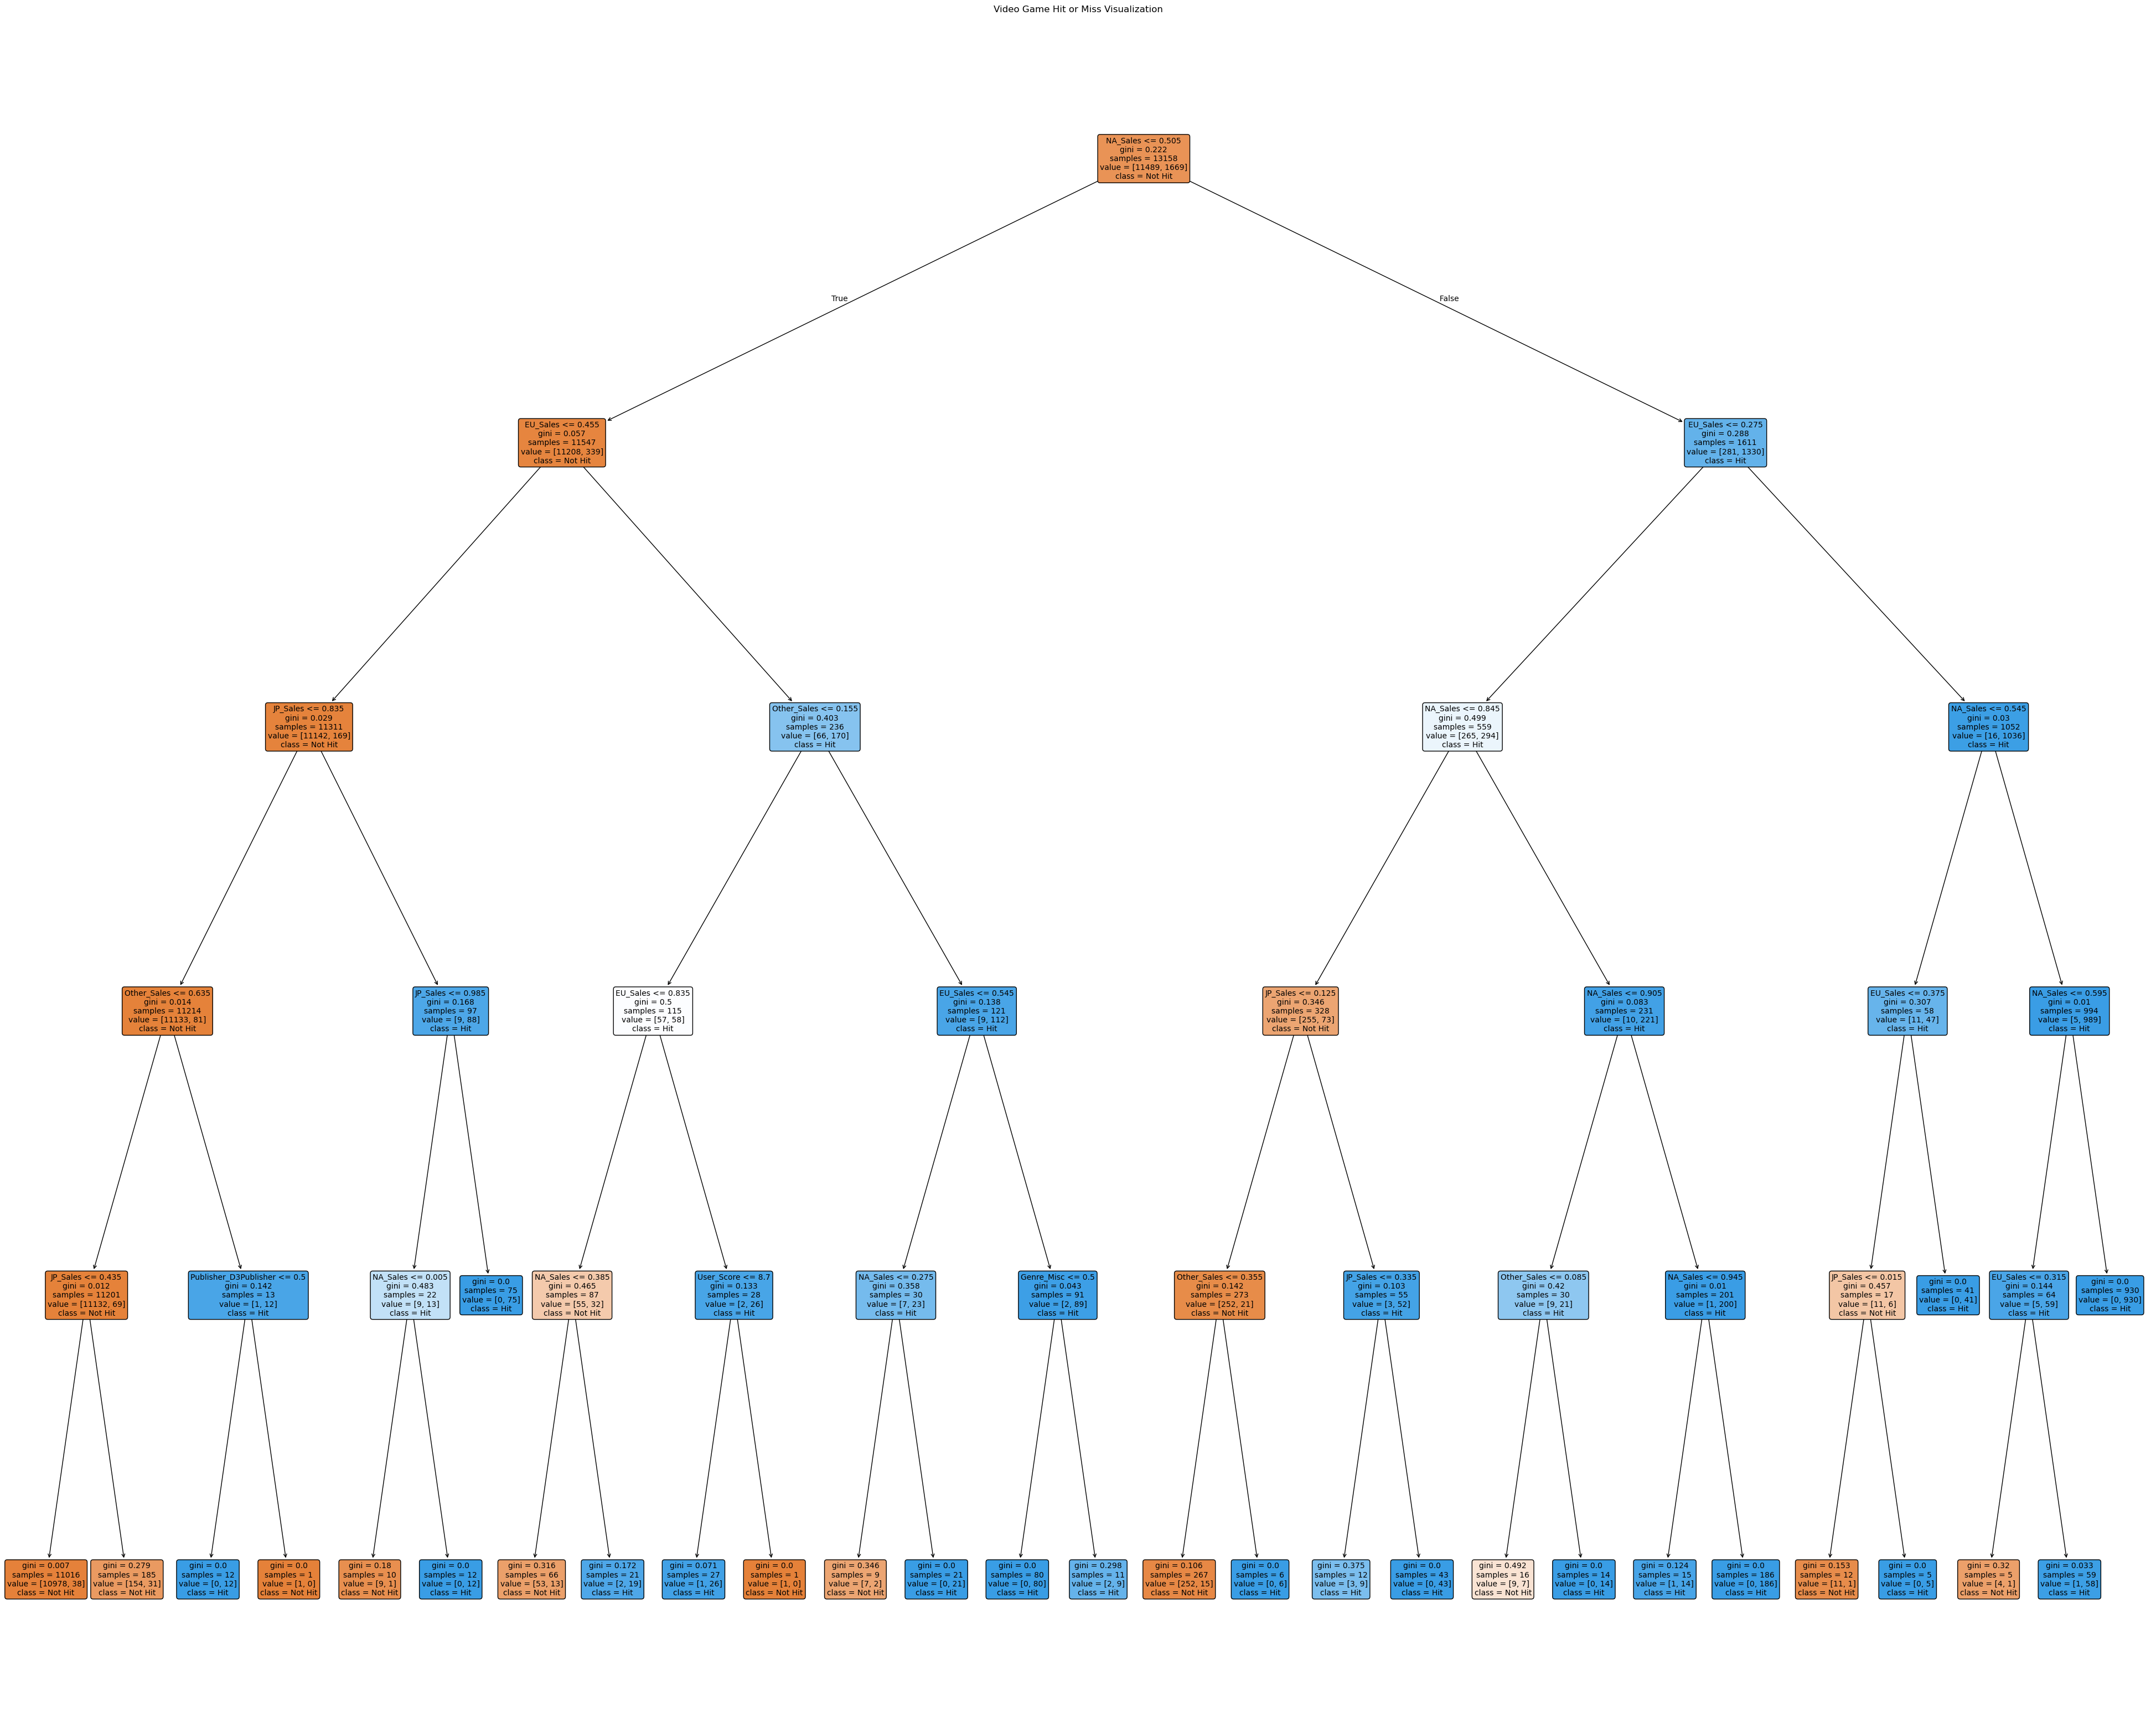

In [55]:
plt.figure(figsize=(50, 40))
plot_tree(model, feature_names=x.columns, class_names=['Not Hit', 'Hit'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Video Game Hit or Miss Visualization")
plt.show()

Here we have our decision tree visualization. We can better see what feature helps decide what to label the game as either hit or not hit.

## Evaluation
The Decision Tree classifier achieved 99% accuracy, with high precision (0.97) and recall (0.93) for predicting hits, resulting in a strong F1 score of 0.95. The confusion matrix confirmed reliable performance, correctly identifying most hits and nearly all non-hits. These metrics show that the model generalizes well and handles class imbalance effectively. Its strong performance makes it a solid baseline for future experimentation, such as testing alternative classifiers or refining feature selection to reduce reliance on sales data.

## Impact
The impact this data might have is that it can show heavy bias on players from North America contributing the most to game sales. On the other side, it can also shed light on to what types of games are doing very well globally, which company made them, and potentially encourage gamers to look at other games those companies have created. Looking at this model won't give viewers the whole picture, but it can be a starting point for them.

## Story
Modeling revealed that regional sales, especially North American sales, are the strongest predictors of a game's success. While I initially aimed to predict hits using features like genre, platform, and scores, the model showed a heavy reliance on sales data, prompting concerns about data leakage. Still, the classifier answered my core question effectively and highlighted the need for careful feature selection.

## References
Microsoft Copilot. (2025). AI-assisted guidance and explanations for video game sales classification project. Retrieved via Copilot on Windows
- All mentions of CoPilot throughout notebook are times when I used it.